# Trabajo Práctico N4. Procesamiento de Imágenes

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Funciones auxiliares

def myplotimg (img,vmin=0,vmax=255,title=None):
  plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)
  if title != None:
    plt.title(title)
  plt.axis("off")
  plt.show()
  return

def show_side_by_side(imgs, subtitles = None, title = None, vmin=0, vmax=255):
    fig, axes = plt.subplots(1, len(imgs))
    if len(imgs) == 1:
        axes = [axes]
    if title is not None:
        fig.suptitle(title, y=0.8)
    if subtitles is None:
        subtitles = [None for _ in imgs]
    for ax, img, subtitle in zip(axes, imgs, subtitles):
        if subtitle is not None:
            ax.set_title(subtitle)
        ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

El valor mas alto de un pixel en la imagen es: 227
El valor mas bajo de un pixel en la imagen es: 0


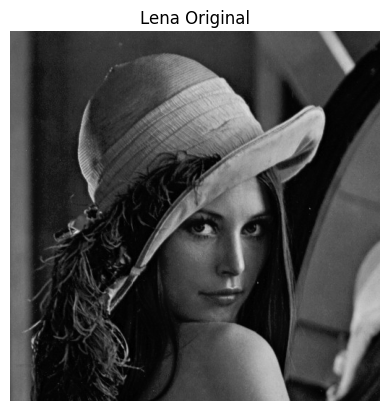

In [4]:
img1=cv2.imread("images/lena_gray.tif",cv2.IMREAD_GRAYSCALE)
print("El valor mas alto de un pixel en la imagen es:", np.amax(img1))
print("El valor mas bajo de un pixel en la imagen es:", np.amin(img1))
myplotimg(img1,title="Lena Original")


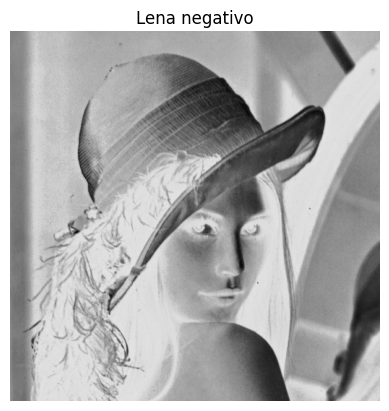

In [5]:
#Para obtener el negativo de la imagen, deberiamos "mapear" los valores altos a bajos, y viceversa.
img_neg = img1 * (-1)                             #Invertimos los valores de cada px
lena_neg = img_neg + np.amax(img1)                 #Desplazamos acorde a la escala inicial
#Mostramos el resultado
myplotimg(lena_neg,title="Lena negativo") #Lenan´t

Ahora, buscamos una transformacion que mapee valores de [0.25,0.5] en [0,1]

In [6]:
#Recibe un input de tipo np.ndarray y lo mapea al rango de valores [0,1]
def uniform_mapping(input):
  min = np.amin(input)
  max = np.amax(input)
  mapped = input - min
  mapped = mapped / 0.25
  return mapped

In [7]:
array = np.arange(0.25,0.51,0.05)
print(array)
mapped_arr = uniform_mapping(array)
print(mapped_arr)

[0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.  0.2 0.4 0.6 0.8 1. ]


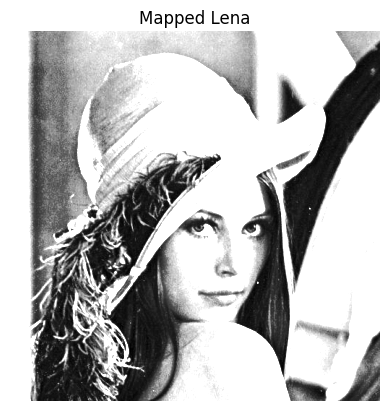

In [8]:
mapped_lena = uniform_mapping(img1)
#Mostramos el resultado
myplotimg(mapped_lena,title="Mapped Lena")

## 2)
Dada la imagen del globo ocular buscar transformaciones que permitan resaltar las venas lo mejor posible (Imagen eyebw.jpg)

In [9]:
#Defino 3 transformaciones basicas vistas en clases, como funciones para mejor legibilidad
#Requisitos:numpy
def img_transform_neg(img):
  #Para obtener el negativo de la imagen, deberiamos "mapear" los valores altos a bajos, y viceversa.
  img_neg = img * (-1)                             #Invertimos los valores de cada px
  img_neg = img_neg + np.amax(img)                 #Desplazamos acorde a la escala inicial
  return img_neg

def img_transform_log(img,c=0.5):
  img_scale = img / 255
  img_log = c * np.log(img_scale + 1)
  img_log = img_log*255
  return img_log

def img_transform_exp(img,gamma=0.3,c=0.5):
  img_scale = img / 255
  img_exp = c * (img_scale**gamma)
  img_exp = img_exp*255
  return img_exp

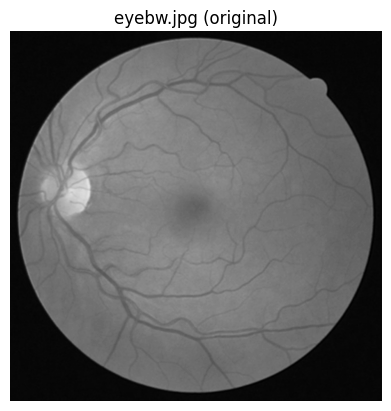

In [10]:
img2 = cv2.imread("images/eyebw.jpg",cv2.IMREAD_GRAYSCALE)
myplotimg(img2,title="eyebw.jpg (original)")

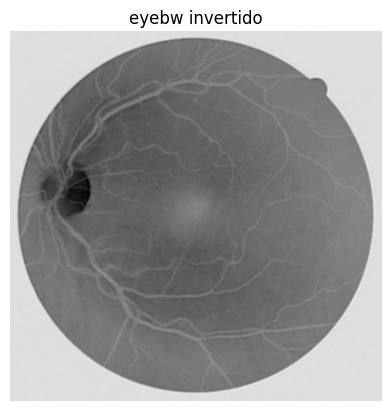

In [11]:
img2_neg = img_transform_neg(img2) 
myplotimg(img2_neg,title="eyebw invertido")

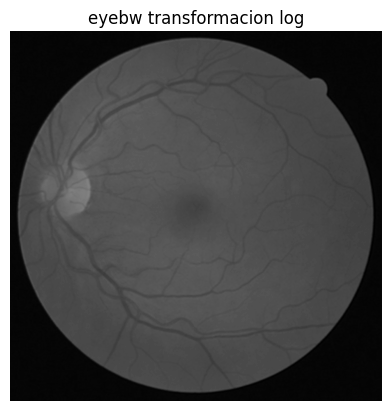

In [12]:
img2_log = img_transform_log(img2,c=0.8) 
myplotimg(img_transform_log(img2,c=0.8),title="eyebw transformacion log")

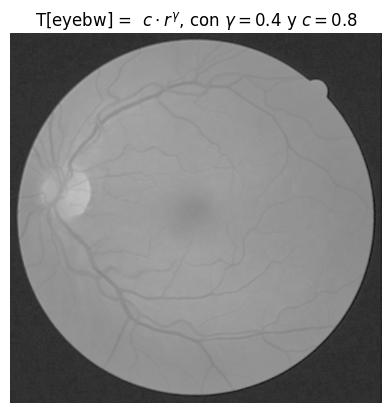

In [13]:
myplotimg(img_transform_exp(img2,c=0.8,gamma=0.4),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 0.4$ y $c = 0.8$')

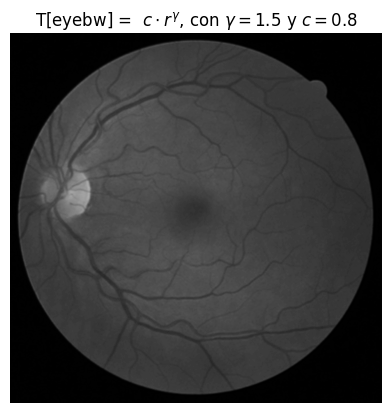

In [14]:
myplotimg(img_transform_exp(img2,c=0.8,gamma=1.5),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 1.5$ y $c = 0.8$')

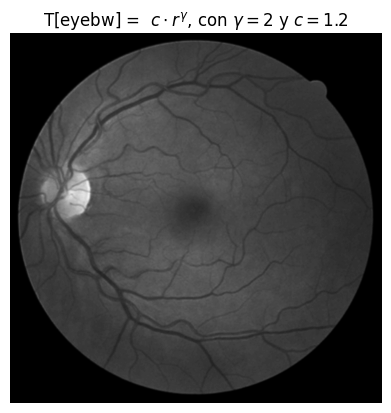

In [15]:
img2_exp = img_transform_exp(img2,c=1.2,gamma=2) 
myplotimg(img_transform_exp(img2,c=1.2,gamma=2),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 2$ y $c = 1.2$')

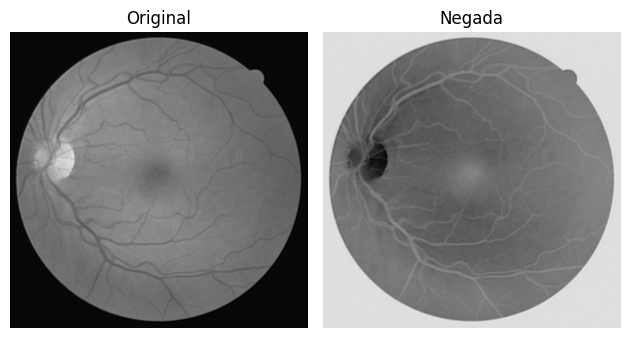

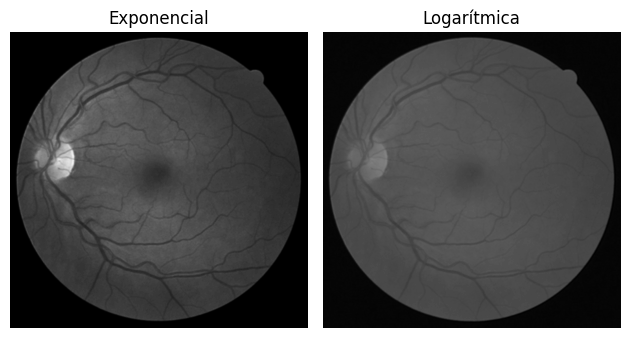

In [16]:
show_side_by_side([img2, img2_neg], subtitles = ["Original","Negada"], title = None, vmin=0, vmax=255)
show_side_by_side([img2_exp, img2_log], subtitles = ["Exponencial","Logarítmica"], title = None, vmin=0, vmax=255)

## 3) 
Bit plane slicing

In [17]:
#bit plane slicer
def bp_slicer(img,bit,res=255):
  simg=img
  x,y = np.shape(simg)
  for i in range(x):
    for j in range(y):
      if simg[i][j]>=2**(bit):
        simg[i][j]=res
      else:
        simg[i][j]=0
  return simg

In [18]:
img3a = cv2.imread("images/8_bit_fractal.png",cv2.IMREAD_GRAYSCALE)
img3b = cv2.imread("images/onedollar.jpg",cv2.IMREAD_GRAYSCALE)

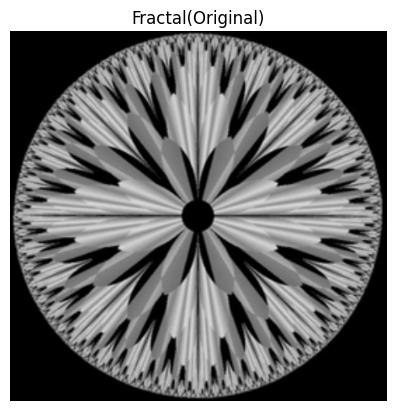

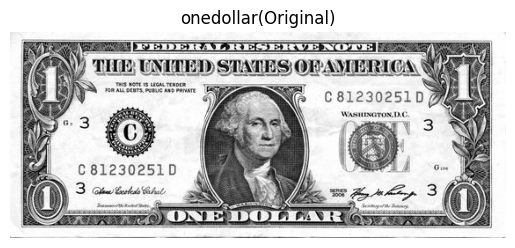

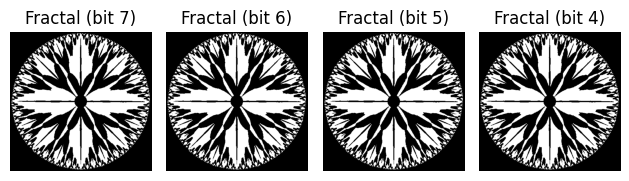

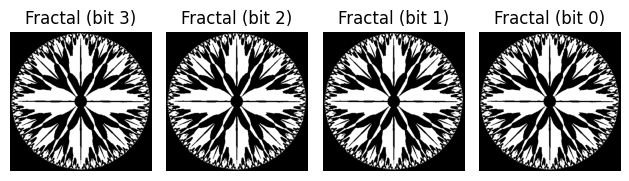

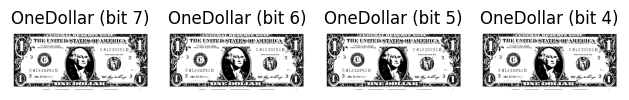

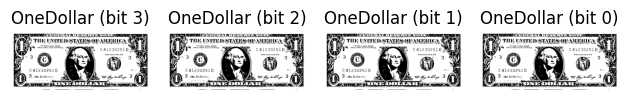

In [19]:
#Fractal & Dollar
slices_a = []
slices_b = []
titles_a = []
titles_b = []
myplotimg(img3a,title="Fractal(Original)")
myplotimg(img3b,title="onedollar(Original)")
for i in reversed(range(8)):
  slices_a.append(bp_slicer(img3a,i,255))
  titles_a.append(f'Fractal (bit {i})')
  slices_b.append(bp_slicer(img3b,i,255))
  titles_b.append(f'OneDollar (bit {i})')

show_side_by_side(slices_a[0:4], subtitles = titles_a[0:4], title = None, vmin=0, vmax=255)
show_side_by_side(slices_a[4:8], subtitles = titles_a[4:8], title = None, vmin=0, vmax=255)
show_side_by_side(slices_b[0:4], subtitles = titles_b[0:4], title = None, vmin=0, vmax=255)
show_side_by_side(slices_b[4:8], subtitles = titles_b[4:8], title = None, vmin=0, vmax=255)

# 3
Histograma
El histograma de una imagen es una forma de analisis de una imagen. El mismo se conforma apartir de, primero obtener las frecuencias absolutas de cada valor de gris (se analizan casos de imagenes en escala de grises) en una imagen, y luego mostrar el grafico de barras resultante. Esta forma de representar a la imagen puede ser útil a la hora de analizar diversos aspectos de la imagen como la iluminación, brillo, contraste, etc. Es importante notar que si bien se tienen en cuenta todos los pixeles de la imagen para armar el histograma, la reconstrucción total de una imagen a partir del mismo es imposible ya que se pierde cualquier tipo de referencia espacial asociado a cada valor de pixel.

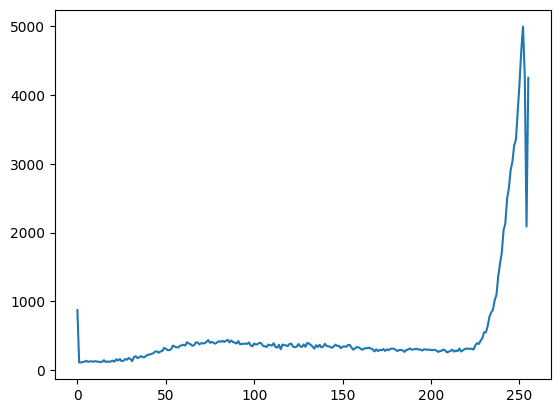

In [25]:
img4a = cv2.imread("images/onedollar.jpg",cv2.IMREAD_GRAYSCALE)
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img4a],[0],None,[256],[0,256])
# show the plotting graph of an image
plt.plot(histr)
plt.show()

### Brillo y contraste
Muchas veces, en conversaciones de ambito no academico, se suelen confundir conceptos asociados a las imagenes digitales que vemos dia a dia. Dos de estos conceptos que se suelen confundir son el brillo y contraste. Para aclarar sobre estos conceptos, podemos decir que el brillo tiene que ver con el nivel general de iluminación que tiene una imagen, es decir "qué tan blanca/negra es la imagen" si se quiere. Entonces, si aumentamos el brillo de una imagen particular, las zonas mas oscuras se hacen mas claras, y las zonas mas claras también. Partiendo de esa base, notamos que (generalmente) no queremos una imagen demasiado blanca (producto de la sobreexposición) ni demasiado oscura (baja exposición), sino que buscamos una distribucion mas pareja de los mismos, y que se respeten lo mas posibles los colores reales del sujeto de la imagen.
Por otro lado, podemos definir como contraste a la separación de los niveles de gris propios en una imagen. Así, una imagen con buen contraste realzará las partes claras, y oscurecerá las partes mas oscuras. Notamos que se define por comparación en este caso, y podemos pensar en un alto contraste como un histograma con picos separados, y caso inverso (bajo contraste) un histograma practicamente centrado, o con picos proximos al medio de la distribución.

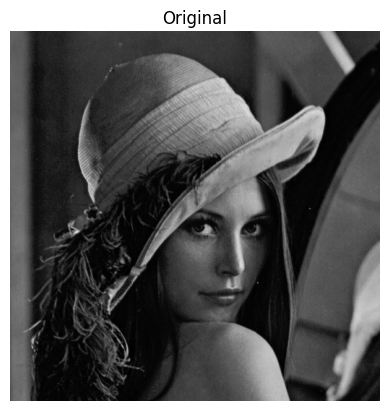

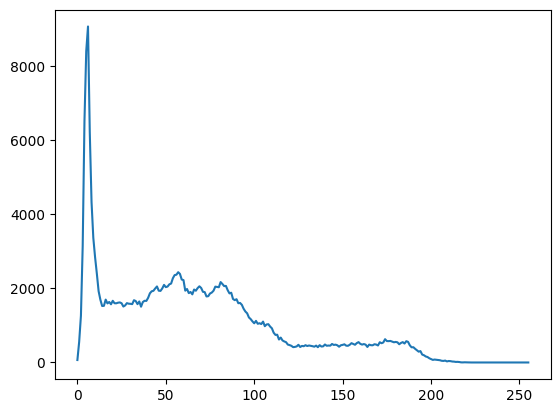

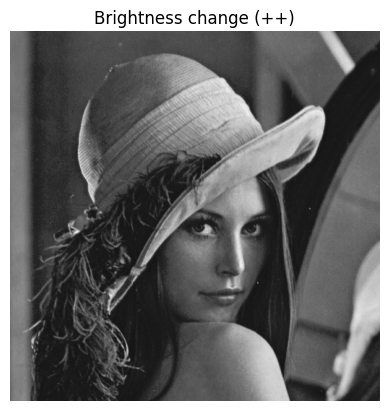

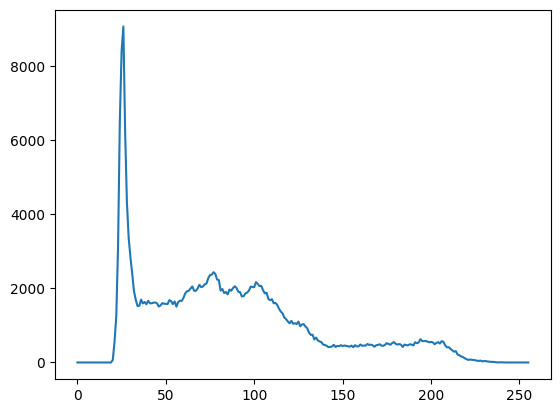

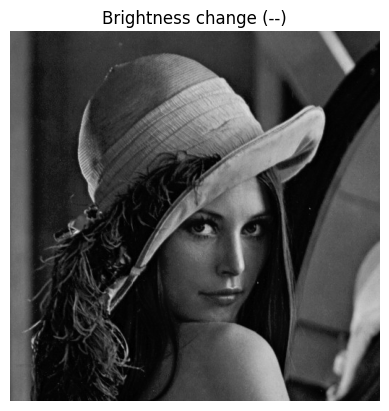

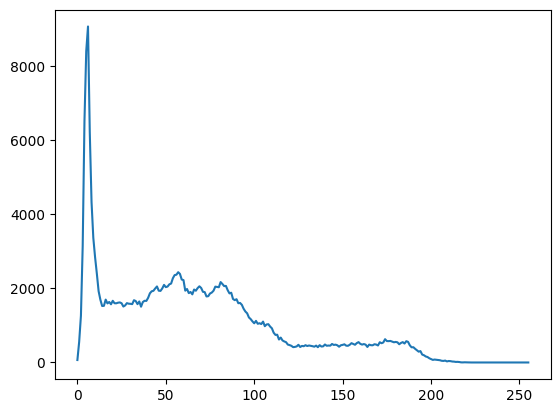

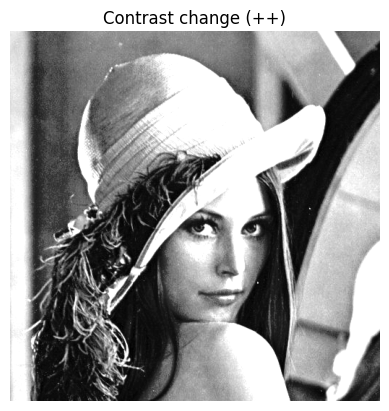

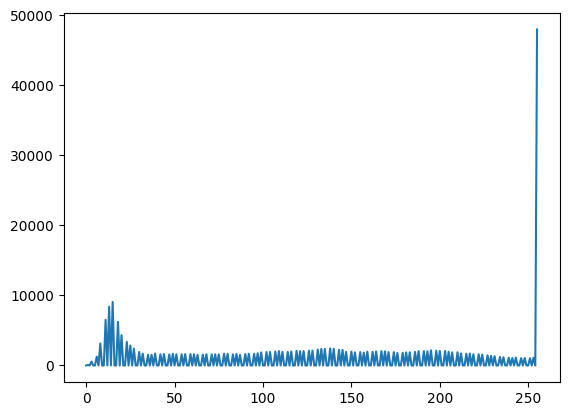

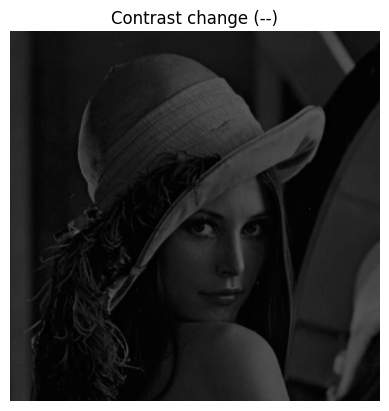

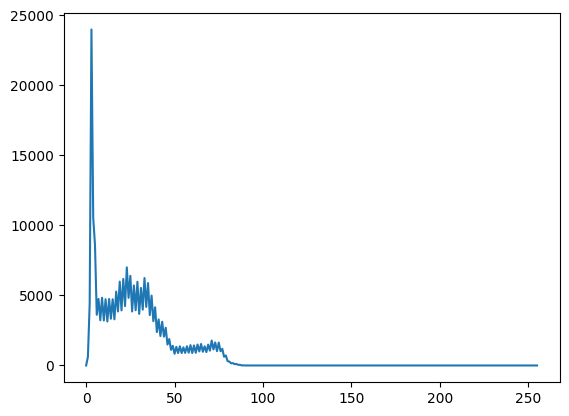

In [30]:
test_img=img1

# call convertScaleAbs function
 #alpha = Contrast control
 #beta = Brightness control
adjusted1bM = cv2.convertScaleAbs(test_img, alpha=1, beta=20)
adjusted1b = cv2.convertScaleAbs(test_img, alpha=1, beta=0.3)
adjusted1cM = cv2.convertScaleAbs(test_img, alpha=2.4, beta=1)
adjusted1c = cv2.convertScaleAbs(test_img, alpha=0.4, beta=1)

histra = cv2.calcHist([test_img],[0],None,[256],[0,256])
histrb = cv2.calcHist([adjusted1bM],[0],None,[256],[0,256])
histrc = cv2.calcHist([adjusted1b],[0],None,[256],[0,256])
histrd = cv2.calcHist([adjusted1cM],[0],None,[256],[0,256])
histre = cv2.calcHist([adjusted1c],[0],None,[256],[0,256])

myplotimg(test_img,title="Original")
plt.plot(histra)
plt.show()
myplotimg(adjusted1bM,title="Brightness change (++)")
plt.plot(histrb)
plt.show()
myplotimg(adjusted1b,title="Brightness change (--)")
plt.plot(histrc)
plt.show()
myplotimg(adjusted1cM,title="Contrast change (++)")
plt.plot(histrd)
plt.show()
myplotimg(adjusted1c,title="Contrast change (--)")
plt.plot(histre)
plt.show()